<a id='sommaire'></a>
<h1 style='text-align:center;border:5px double;border-color:gray;'>
    <br/>
    PROJET 7<br/>
    <br/>
    "Effectuez une prédiction de revenus"
    <br/>
    <br/>
    Partie 2: Etude de modèles<br/>
</h1>

## [ANOVA de la variable revenus des enfants en fonction du pays](#anova)  
* [Vérification de l'hypothèse gaussienne](#verif)  
* [Comparaison de l'ANOVA avec le logarithme du revenu de l'individu](#Comparaison)  
* [Comparaison de l'ANOVA avec le logarithme du revenu de l'individu](#Comparaison) 
* [Conclusion](#ccl)  

## [Régression linéaire du revenu enfant sur le revenu moyen du pays et l'indice de Gini](#reg1)  
* [Tests de significativité](#test1)  
* [Passage au logarithme du revenu enfant](#log1)  
* [Analyses de $R^2$](#rsq1)  
* [Détection des problèmes de colinéarité](#vif1)  
* [Test d'homoscédasticité](#breu1)  
* [Test de normalité des résidus](#norm1)  

## [Régression linéaire du revenu enfant sur le revenu moyen du pays, l'indice de Gini et la classe de revenus des parents](#reg2)  
* [Tests de significativité](#test2)  
* [Passage au logarithme du revenu enfant](#log2)  
* [Analyses de $R^2$](#rsq2)  
* [Détection des problèmes de colinéarité](#vif2)  
* [Test d'homoscédasticité](#breu2)  
* [Test de normalité des résidus](#norm2)  



## [Analyses de $R^2$](#rsq1)  
* [Analyse de l'atypicité sur les variables explicatives](#atyp1)  
* [Analyse de l'atypicité sur la variable à expliquer (residus studentisés)](#atyp1bis)  
* [Analyse de l'influence des observations](#infl1)  
* [Mesures atypiques et influentes](#atyp_infl1)  
  

## [Conclusion](#ccl)  

Pour cette mission 4, nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.
<br><br>
<div class="alert alert-block alert-warning">  
Pour chacune des régressions suivantes, vous testerez 2 versions : l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln), l'autre en les laissant tels quels. Vous choisirez la version la plus performante pour répondre aux question.                                                   
</div>  

<p>Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?
                                                            
Selon ce modèle, donnez la décomposition de variance totale expliquée par :
                                                            
- le pays de naissance (ie. le revenu moyen et l’indice de Gini) ;
- les autres facteurs non considérés dans le modèle (efforts, chance, etc.).

<br>
    
Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?
                                                            
En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?
                                                            
Selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :
- le pays de naissance et le revenu des parents
- les autres facteurs non considérés dans le modèle (efforts, chance, etc.). </p>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<a id='anova'></a>
# ANOVA de la variable revenus des enfants en fonction du pays

[Haut de page](#sommaire)

### Mission: Créer un modèle permettant de déterminer le revenu potentiel d'une personne  
  

* Etude retrospective  
* Variable d'intérêt (dépendante, à expliquer): 'y_child' ou 'ln_y_child'  
* Facteur (variables indépendantes, explicatives): 'Pays', 'mj', 'ln_mj', 'Gj', 'c_i_parent'  
  
#### Description des variable:  
  
**y_child**: revenu  
**ln_y_child**: logarithme de y_child  
**Pays**: Pays d'appartenance d'un individus  
**mj**: revenu moyen par pays  
**ln_mj**: logarithme de mj  
**Gj**: Indice de Gini du pays  
**c_i_parent**: classe de revenu des parent




https://www.techno-science.net/glossaire-definition/Analyse-de-la-variance.html

In [10]:
# Chargement des données
df= pd.read_csv('analyse.csv')
df

,country,country_code,population,y_child,gdpppp,Gj,mj,pj,c_i_parent,ln_y_child,ln_mj
0,Albania,ALB,2947314.0,728.89795,7297.0,0.321410,2994.829902,0.815874,1,6.591534,8.004643
1,Albania,ALB,2947314.0,728.89795,7297.0,0.321410,2994.829902,0.815874,1,6.591534,8.004643
2,Albania,ALB,2947314.0,728.89795,7297.0,0.321410,2994.829902,0.815874,1,6.591534,8.004643
3,Albania,ALB,2947314.0,728.89795,7297.0,0.321410,2994.829902,0.815874,1,6.591534,8.004643
4,Albania,ALB,2947314.0,728.89795,7297.0,0.321410,2994.829902,0.815874,1,6.591534,8.004643
...,...,...,...,...,...,...,...,...,...,...,...
5799995,Yemen,YEM,21892149.0,9050.43750,2224.0,0.390259,1042.635870,0.400000,100,9.110568,6.949507
5799996,Yemen,YEM,21892149.0,9050.43750,2224.0,0.390259,1042.635870,0.400000,100,9.110568,6.949507
5799997,Yemen,YEM,21892149.0,9050.43750,2224.0,0.390259,1042.635870,0.400000,100,9.110568,6.949507
5799998,Yemen,YEM,21892149.0,9050.43750,2224.0,0.390259,1042.635870,0.400000,100,9.110568,6.949507


In [11]:
#storage optimization
df['country'] = df['country'].astype('category')


<a id='verif'></a>
<h2 style='color:#8677b2'>Vérification de l'hypothèses </h2>

[Haut de page](#sommaire)

In [12]:
# Pour l'ensemble des tests, notre niveau de test sera:
alpha = 0.05

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<b>Hypothèses des tests paramétriques : </b>

- Les distributions de population sont normales

- Les échantillons ont des variances égales
    
Les conditions de validité de l'analyse de la variance

* les résidus sont indépendants.
* les résidus suivent une loi Normale de moyenne 0 et de variance = variance résiduelle.
* les résidus sont homogènes.
    
Il est donc nécessaire de vérifier la normalité des distributions et l'homoscédasticité (homogénéité des variances, par des tests de Bartlett ou de Levene par exemple).

Si ces hypothèses ne sont pas vérifiées, il est toujours possible d’appliquer une transformations au niveau des réponses (log par exemple), ou bien d’utiliser une ANOVA non-paramétrique (test de Kruskal-Wallis), ou encore de réaliser une ANOVA basée sur des tests de permutations.
    
    
**Le pays d'origine a-t-il une influence sur le revenu?**\
H0: Tous les pays ont le même revenu \
Le pays n'a pas d'influence sur le revenu enfant moyen\

H1: Les revenus dépendent du pays \
Le pays a une influence sur le revenu



</div>



#### Normality


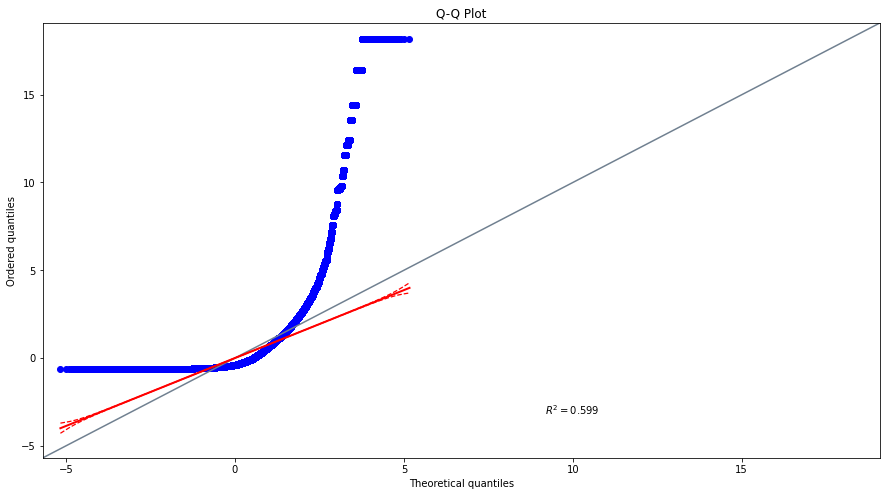

In [13]:
pg.qqplot(df['y_child'], dist='norm', figsize=(15,8))
#pg.qqplot : Cette fonction renvoie un nuage de points du quantile des données d'échantillon x par rapport aux quantiles théoriques de la distribution donnée dans dist (par défaut = 'norm').
#norm : nom de la distribution ou de la fonction de distribution. La valeur par défaut est « norm » pour un tracé de probabilité normal.
plt.savefig('graph/ Plot Anova.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5);

In [14]:
##  Shapiro-Wilk normality test
from scipy import stats
stats.shapiro(df['y_child']) 

/Users/RowaidKanaan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6011691093444824, pvalue=0.0)

#### Homoscedasticity

<div class="admonition note alert alert-info" style="color:#4cb2ff">
Comme pour le test de l'hypothèse de normalité, il existe quelques tests statistiques disponibles pour tester l'hypothèse d'égalité des variances. Certaines méthodes courantes sont le test de Barlett et le test de Levene pour l'égalité des variances. Le choix du test correct dépend également de l'hypothèse de normalité.
</div>

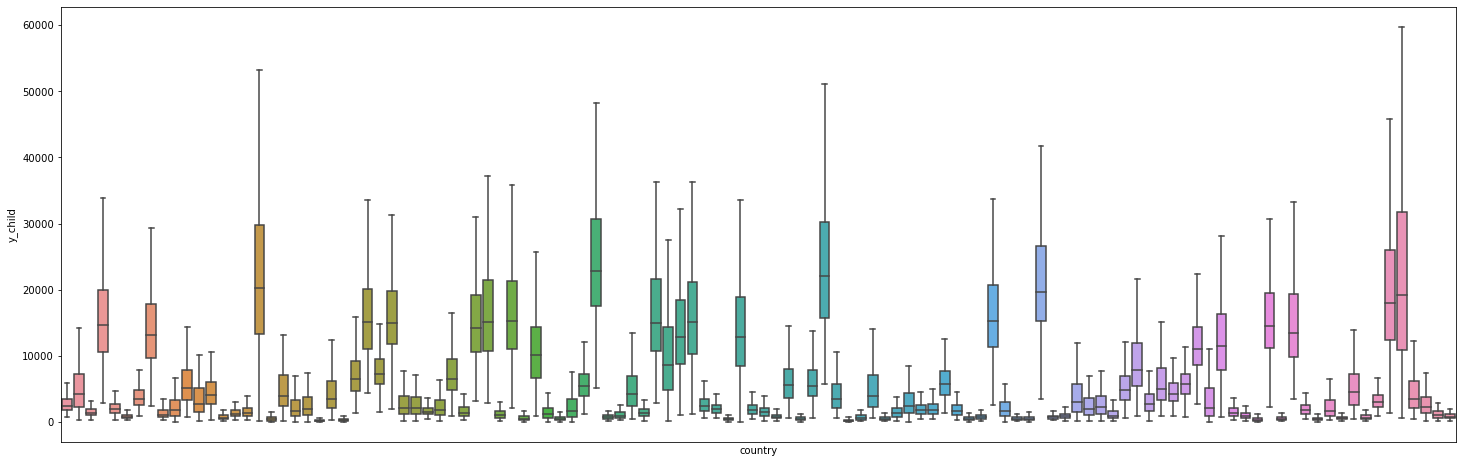

In [15]:
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x='country', y='y_child', showfliers=False)
#Dessiner une boîte à moustaches pour montrer les distributions par rapport aux catégories.
plt.xticks([])
plt.xlabel('country')
plt.savefig('data/ Variance des incomes des différents pays - Anova.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5);

Les pays semblent assez différentes, même si l'ordre de grandeur de ces écarts n'est pas très grand. La question sera de savoir si ces écarts sont significatifs ou pas. C'est l'ANOVA qui nous permettra de répondre à cette question.

In [16]:
pg.homoscedasticity(df, dv='y_child', group='pays', method='levene', alpha=0.05)



AssertionError: 

La p-valeur de ce test (~0.0) est très petite et largement inférieure à 5%. On rejette donc l'hypothèse H0 selon laquelle . Le pays a donc bien une influence sur le revenu moyen des individus, comme nous en avions l'intuition en regardant les boxplot…

En fait, même si les hypothèses du modèle linéaire ne sont pas respectées, il se pourrait que tout aille bien tout de même .
 La raison à cela, , le modèle linéaire est robuste, c'est-à-dire que sous réserve qu'il y ait une taille d'échantillon suffisante, les résultats du modèle linéaire restent valables.
 
 les tests révéler que les résidus ne sont ni gaussiens, ni homoscédastiques. , en vrai, l'application du modèle linéaire n'exige pas un respect exact des hypothèses, mais un respect approximatif 

# Data transformation

In [ ]:
#normality 
pg.qqplot(df['ln_y_child'], dist='norm', figsize=(15,8))
plt.savefig('data/ Plot log - Anova.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5);

In [ ]:
#homoscedasticity
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x='pays', y='ln_y_child', showfliers=False)
plt.xticks([])
plt.xlabel('Pays')
plt.savefig('data/ Variance des incomes des différents pays - log - Anova.jpeg', dpi=300, bbox_inches='tight',   pad_inches=0.5);

In [ ]:
pg.homoscedasticity(df, dv='ln_y_child', group='pays', method='levene', alpha=0.05)

#### Conclusion

<div class="admonition note alert alert-info" style="color:#4cb2ff">
Bien que la transformation des données permette de se rapprocher un peu plus d'une distribution normale, l'homogénéité des variances n'est toujours pas respectée.

<br><br>
Pour continuer, nous réalisons donc un test de Kruskal-Wallis, qui est un test non paramétrique.    
    
    


### The Kruskal-Wallis test

$\left\{
\begin{array}{l}
 H_0\ : \ \bar{x}_1 = \bar{x}_2 = \bar{x}_k,\ les\ deux\ variables\ étudiées\ sont\ donc\ indépendantes \\
 H_1\ : \ \bar{x}_1 ≠ \bar{x}_2 ≠ \bar{x}_k,\ les\ deux\ variables\ sont\ donc\ dépendantes
\end{array}
\right.$

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<b>NB :</b>
Le test de Kruskal-Wallis concerne l'analyse des médianes et non des moyennes</div>

In [17]:
#α risk 
α = 0.05

#Kruskal-Wallis test
krskl = pg.kruskal(data=df, dv='y_child', between='country')
krskl

,Source,ddof1,H,p-unc
Kruskal,country,115,4.297172e+06,0.0


<div class="admonition note alert alert-info" style="color:#4cb2ff">
<b>"Plus nous avons de données disponibles, plus l'ANOVA est capable de résister à un écart significatif par rapport aux hypothèses."</b> 
<br><br>    
<a href='http://perso.ens-lyon.fr/lise.vaudor/non-respect-des-hypotheses-du-modele-lineaire-anova-regression-cest-grave-docteur/'> Interesting source about non respect of ANOVA hypothesis</a> 
</div>


<a id='Comparaison'></a>
<h2 style='color:#8677b2'>Comparaison de l'ANOVA avec le logarithme du revenu de l'individu</h2>

In [18]:
pg.anova(data=df, dv='y_child', between='country', detailed=False)

,Source,ddof1,ddof2,F,p-unc,np2
0,country,115,5799884,49710.75889,0.0,0.49639


R² = 0.496, on peut en conclure que la variable explicative Pays explique près de 50% de la variance du revenu de l'individu. Le reste, donc la moitié de la variance sur le revenu est expliquée par les autres facteurs non considérés dans ce modèle.

In [19]:
pg.anova(data=df, dv='ln_y_child', between='country', detailed=False)

,Source,ddof1,ddof2,F,p-unc,np2
0,country,115,5799884,135832.373968,0.0,0.729238


En considérant le logarithme du revenu, la variance expliquée est plus concluante, 73% contre 50% précédemment.




<a id='ccl'></a>
<h2 style='color:#8677b2'>Conclusion </h2>

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p>Les statistiques des tests H et F conduisent toutes deux à la conclusion qu'il existe une différence significative entre les médianes (ou les moyennes) des y_childs des différents pays (α = 0,05).</p>

<p>Ainsi, même si la force du lien entre le pays d'origine et la répartition des revenus est forte (η2 = 0,50), la variance expliquée reste faible.</p>

<p>Cependant, lorsque l'ANOVA est effectuée sur la transformation logarithmique du revenu, la variance expliquée est bien meilleure (η2 = 0,73).</p>
</div>

<a id='reg1'></a>
# Régression linéaire du revenu enfant sur le revenu moyen du pays et l'indice de Gini

<div class="alert alert-block alert-warning">  
Pour chacune des régressions suivantes, vous testerez 2 versions : l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln), l'autre en les laissant tels quels. Vous choisirez la version la plus performante pour répondre aux question.                                                   
</div>  

Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?
                                                            
Selon ce modèle, donnez la décomposition de variance totale expliquée par :
                                                            
- le pays de naissance (ie. le revenu moyen et l’indice de Gini) ;
- les autres facteurs non considérés dans le modèle (efforts, chance, etc.).

### Première Régression Linéaire : Revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu


le principe de la régression linéaire : La régression linéaire est une approche statistique pour modéliser la relation entre une variable dépendante et un ensemble donné de variables indépendantes. La régression permet de juger de la qualité d'explication de la variable dépendante par les variables indépendantes.

Le modèle statistique sous-jacent est très simple, il s'agit d'une modèle linéaire qui est généralement écrit :
y=constante + beta1 x1 + beta2 x2 + ... + erreur.

L'estimation des paramètres de ce modèle se fait par l'estimateur des moindres carrés et la qualité d'explication est généralement évalué par le R².

La qualité de prédiction est généralement mesurée avec le RMSE (racine de la somme des carrés des erreurs).



In [20]:
lr1 = smf.ols('y_child ~ mj + Gj', data=df).fit()
lr1.summary().tables[0]


Dep. Variable:,y_child,R-squared:,0.496
Model:,OLS,Adj. R-squared:,0.496
Method:,Least Squares,F-statistic:,2.858e+06
Date:,"Sun, 08 May 2022",Prob (F-statistic):,0.00
Time:,08:40:06,Log-Likelihood:,-5.9310e+07
No. Observations:,5800000,AIC:,1.186e+08
Df Residuals:,5799997,BIC:,1.186e+08
Df Model:,2,,
Covariance Type:,nonrobust,,


**Test global:**  
H0: beta_GJ = beta_y_mj = 0  
H1: beta_GJ != beta_y_mj != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif

In [21]:
lr1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.567e-09,14.699,-1.07e-10,1.000,-28.809,28.809
mj,1.0000,0.000,2234.874,0.000,0.999,1.001
Gj,3.929e-09,33.529,1.17e-10,1.000,-65.715,65.715


 **Test de significativité des variables:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)  
En effet p-value ~ 1 > alpha, on accepte H0, le paramètre n'est pas significatif (beta_Gj = 0)  
  
H0: beta_y_mj = 0  
H1: beta_y_mj != 0  
Le paramètre beta_y_mj de la variable mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_y_mj != 0)

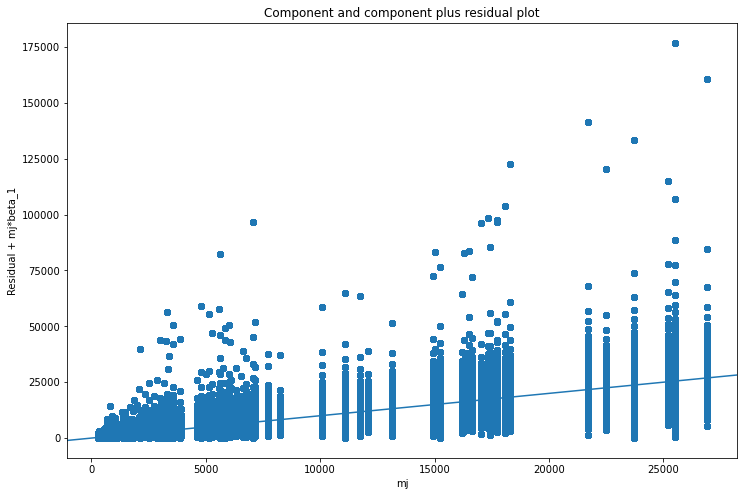

In [22]:
#Approche visuelle rapide de notre régression linéaire
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(lr1, "mj", ax=ax)


<div class="admonition note alert alert-info" style="color:#4cb2ff">
Ce modèle n'explique que 50% de la variance, nous ne sommes pas plus performant que l'ANOVA. Il peut s'agir d'un problème de linéarité, car les salaires ont tendance à évoluer de manière exponentielle. Nous analyserons ce modèle plus bas pour vérifier cette hypothèse.
</div>

<a id='log1'></a>
<h3 style='color:#8677b2'>Passage au logarithme du revenu enfant</h3>

[Haut de page](#sommaire)

In [23]:
lr2 = smf.ols('ln_y_child ~ Gj + ln_mj', data=df).fit()


lr2.summary().tables[0]

Dep. Variable:,ln_y_child,R-squared:,0.729
Model:,OLS,Adj. R-squared:,0.729
Method:,Least Squares,F-statistic:,7.793e+06
Date:,"Sun, 08 May 2022",Prob (F-statistic):,0.00
Time:,08:40:15,Log-Likelihood:,-6.3181e+06
No. Observations:,5800000,AIC:,1.264e+07
Df Residuals:,5799997,BIC:,1.264e+07
Df Model:,2,,
Covariance Type:,nonrobust,,


**Test global:**  
H0: beta_GJ = beta_ln_mj = 0  
H1: beta_GJ != beta_ln_mj != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif  

In [24]:
lr2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4961,0.003,170.994,0.000,0.490,0.502
Gj,-1.6523,0.004,-471.886,0.000,-1.659,-1.645
ln_mj,0.9864,0.000,3651.055,0.000,0.986,0.987


 **Test de significativité:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_Gj != 0)  
  
H0: beta_ln_mj = 0  
H1: beta_ln_mj != 0  
Le paramètre beta_ln_mj de la variable ln_mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_ln_mj != 0)

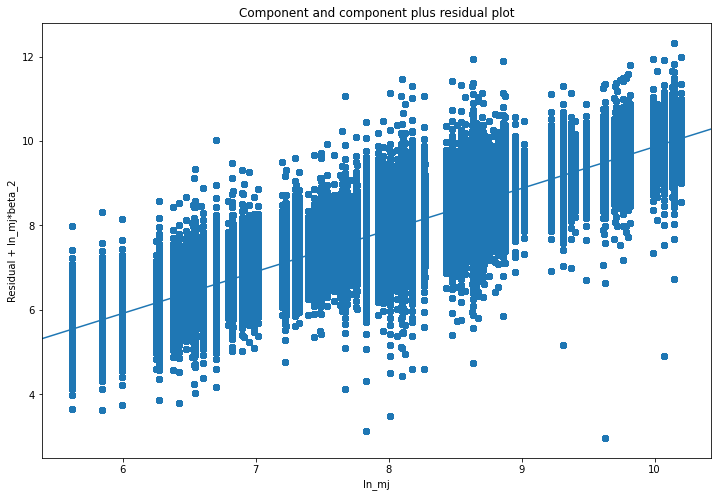

In [25]:
#Approche visuelle rapide de notre régression linéaire
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(lr2, "ln_mj", ax=ax)


<a id='rsq1'></a>
<h3 style='color:#8677b2'>Analyses de $R^2$</h3>

[Haut de page](#sommaire)

In [26]:
def decomposition_of_variances(MLR) :
    """
    Parameters : 
        MLR : Multiple Linear Regression Model
        
    Return : 
        DataFrame with for each explanatory variable the explanation of the variance percentage of model.
    """
    
    data = sm.stats.anova_lm(MLR, typ=1)
    ssq = data[['sum_sq']]
    ssq = np.round(100 * ssq / ssq.sum(), 3)
    ssq['sum_sq'] = ssq.sum_sq
    ssq.columns = ['Explained Variance (%)']
    return(ssq)

In [27]:
decomposition_of_variances(lr2)

,Explained Variance (%)
Gj,10.551
ln_mj,62.329
Residual,27.120


**Dans notre modèle:**

La variable 'Gj' explique 10.55% de la variance de la variable 'ln_y_child'

La variable 'ln_mj' explique 62.33% de la variance de la variable 'ln_y_child'

Notre modèle explique 72.88% de la variance de la variable 'ln_y_child'



<a id='vif1'></a>
<h3 style='color:#8677b2'>Détection des problèmes de colinéarité</h3>

[Haut de page](#sommaire)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(MLR, variables) :
    
    '''
    Parameters : 
        MLR : Multiple Linear Regression
        variables : list, explanatory variables
        inéaire multiple donné et la liste
        
    Return : 
        Dataframe 
    '''
    
    MEX = MLR.model.exog
    return(pd.DataFrame({'VIF' : [variance_inflation_factor(MEX, i) for i in 
                                  np.arange(1, MEX.shape[1])]}, index=variables))

In [29]:
VIF(lr2, ['log_mj', 'Gj'])

,VIF
log_mj,1.076906
Gj,1.076906


VIF_Gj et VIF_ln_y_child_moy < 10 (ou même 5)
Pas de problème de colinéarité



<a id='breu1'></a>
<h3 style='color:#8677b2'>Test d'homoscédasticité</h3>

[Haut de page](#sommaire)

In [30]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr2.resid, lr2.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


H0: Homoscédasticité  
H1: Hétéroscédasticité  
pvalue <<< alpha, rejet de H0, il y a hétéroscédasticité des residus  
Encore une fois, le modèle de regression linéaire multiple est suffisamment robuste pour les grands échantillons. 11_660 ici, c'est notre cas.  
Plus on a de données à disposition, plus le modèle est capable de supporter des écarts important aux hypothèse (gaussienne et homoscédastique)

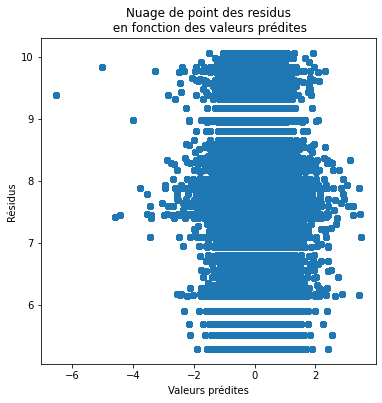

In [31]:
# Représentation des résidus en fonction des valeurs prédites
plt.figure(figsize=(6,6))

plt.scatter(lr2.resid, lr2.predict())

plt.ylabel('Résidus')
plt.xlabel('Valeurs prédites')
plt.title('Nuage de point des residus\n en fonction des valeurs prédites')

plt.savefig('graph/homoscedasticity lr2.png')
plt.show()

<a id='norm1'></a>
<h3 style='color:#8677b2'>Test de normalité des résidus</h3>

[Haut de page](#sommaire)

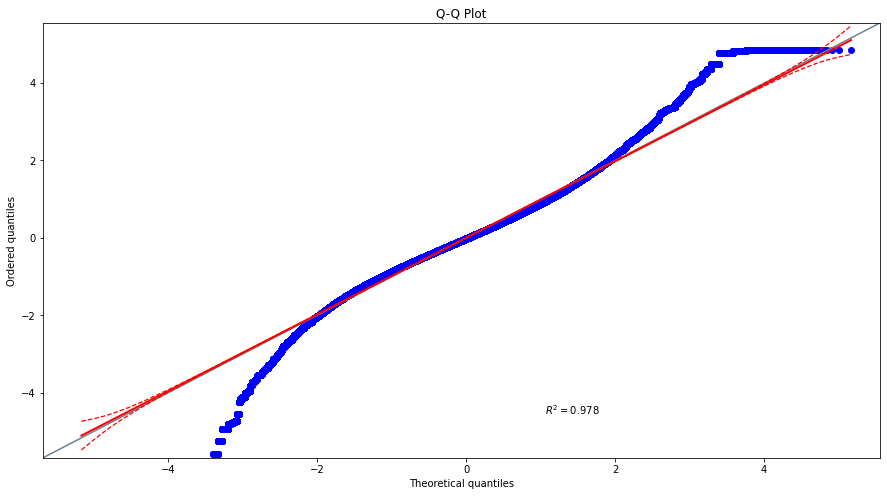

In [32]:
pg.qqplot(lr2.resid, dist='norm', figsize=(15,8))
plt.savefig('graph\ Plot RL Residus lr2 .jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5);

La droite de Henry represente la distribution empirique des residus et la distribution théorique d'une loi normale.
Sauf pour les valeurs faibles de nos résidus, nos residus semblent plutôt alignés avec la distribution théorique d'une loi normale.

In [34]:
# Test de Jarque-Bera (test de normalité basé sur le kurtosis et le skewness)
JB_ln, JBpv_ln, skw_ln, kurt_ln = sm.stats.stattools.jarque_bera(lr2.resid)
JB_ln, JBpv_ln, skw_ln, kurt_ln

(1752380.5494372346, 0.0, -0.08087638371640837, 5.68794826995761)

H0: Les données suivent une loi normale

H1: Les données ne suivent pas une loi normale

JBpv ~ 0, on rejette H0, d'après le test, les données ne suivent pas une loi normale

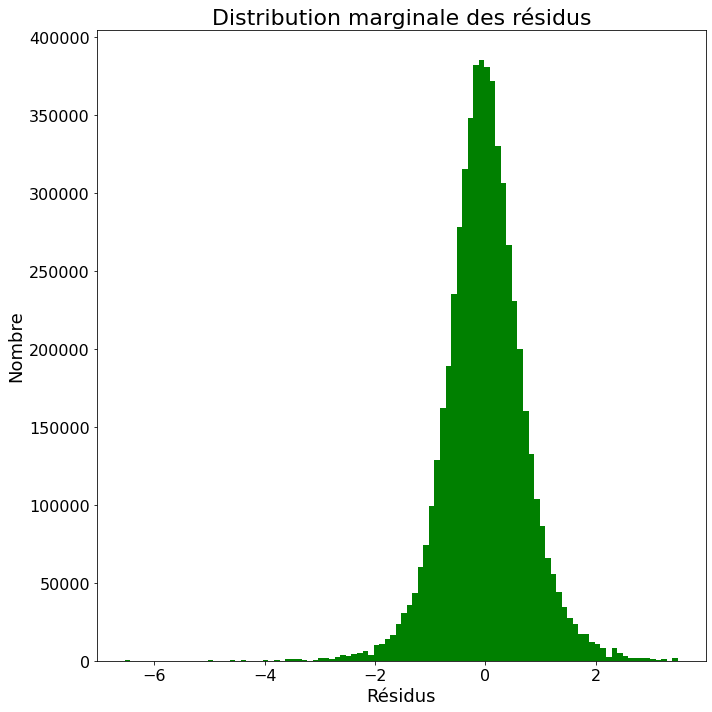

In [38]:
#Représentation de la distribution marginale
plt.figure(figsize=(10,10,))

plt.hist(lr2.resid, 100, facecolor='g',)

plt.title(f'Distribution marginale des résidus', fontsize=22)
plt.ylabel('Nombre', fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()

plt.savefig('graph/dist_marg_resid_reg1 lr2.png')
plt.show()

<div class="admonition note alert alert-info" style="color:#4cb2ff">
Comme lors de l'étude de l'ANOVA, la version logarithmique est plus perfomante. Il ressort que le modèle 2, en prenant donc le logarithme du revenu et le logarithme du revenu moyen, la performance est plus optimale. Les p-valeurs sont d'ailleurs très faibles.

Nous retrouvons le même niveau de performance que dans l'ANOVA du logarithme du revenu. Le modèle 2 peut expliquer 73% de la variance, le restant peut s'expliquer sur d'autres critères non pris en compte jusqu'ici, à savoir les classes de revenu des parents, ou encore des critères sociaux professionels, etc…</div>

<a id='reg2'></a>
## Régression linéaire du revenu enfant sur le revenu moyen du pays, l'indice de Gini et la classe de revenus des parents

<div class="alert alert-block alert-warning">  
Pour chacune des régressions suivantes, vous testerez 2 versions : l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln), l'autre en les laissant tels quels. Vous choisirez la version la plus performante pour répondre aux question.                                                   
</div>  

Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?
                                                            
Selon ce modèle, donnez la décomposition de variance totale expliquée par :
                                                            
- le pays de naissance (ie. le revenu moyen et l’indice de Gini) ;
- les autres facteurs non considérés dans le modèle (efforts, chance, etc.).

<a id='test2'></a>
<h3 style='color:#8677b2'>Tests de significativité</h3>

[Haut de page](#sommaire)

In [39]:
lr3 = smf.ols('y_child ~ mj + Gj + c_i_parent', data=df).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 2.104e+06
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        08:46:14   Log-Likelihood:            -5.9164e+07
No. Observations:             5800000   AIC:                         1.183e+08
Df Residuals:                 5799996   BIC:                         1.183e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2590.0591     15.094   -171.590      0.0

**Test global:**  
H0: beta_GJ = beta_mj = beta_c_i_parent = 0  
H1: beta_GJ != beta_mj = beta_c_i_parent != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif

**Test de significativité:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)  
En effet p-value ~ 1 > alpha, on accepte H0, le paramètre n'est pas significatif (beta_Gj = 0)  
  
H0: beta_mj = 0  
H1: beta_mj != 0  
Le paramètre beta_mj de la variable mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_mj != 0)  
  
H0: beta_c_i_parent = 0  
H1: beta_c_i_parent != 0  
Le paramètre beta_c_i_parent de la variable c_i_parent est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_c_i_parent != 0) 

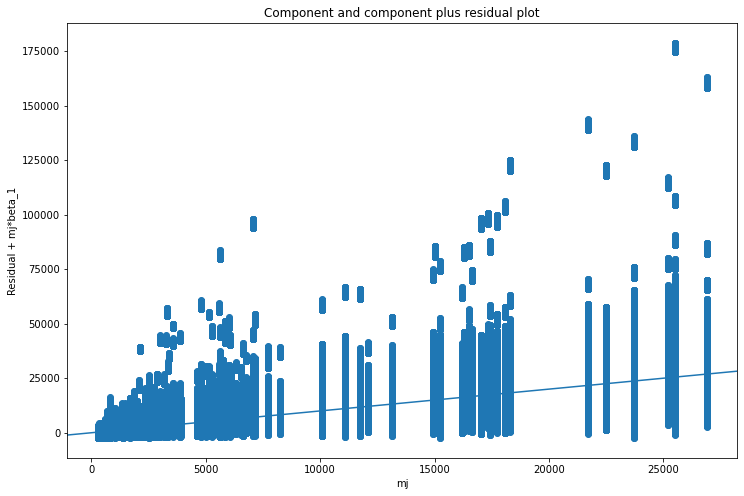

In [40]:
#Approche visuelle rapide de notre régression linéaire
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(lr3, "mj", ax=ax)


In [41]:
decomposition_of_variances(lr3)

,Explained Variance (%)
mj,49.639
Gj,0.000
c_i_parent,2.473
Residual,47.888


<a id='log2'></a>
<h3 style='color:#8677b2'>Passage au logarithme du revenu enfant</h3>

[Haut de page](#sommaire)

In [42]:
lr4 = smf.ols('ln_y_child ~ c_i_parent+ ln_mj +Gj', data=df).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_y_child   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 6.856e+06
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        08:46:23   Log-Likelihood:            -5.7109e+06
No. Observations:             5800000   AIC:                         1.142e+07
Df Residuals:                 5799996   BIC:                         1.142e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0506      0.003    -19.072      0.0

**Test global:**  
H0: beta_GJ = beta_ln_mj = beta_c_i_parent = 0  
H1: beta_GJ != beta_ln_mj = beta_c_i_parent != 0  
F ~ 0.00 <<< alpha, on rejette H0, le modèle est globalement significatif

**Test de significativité:**
   
H0: beta_Gj = 0  
H1: beta_Gj != 0  
Le paramètre beta_Gj de la variable Gj (indice de gini) n'est pas significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0<<< alpha, on rejette H0, le paramètre est significatif (beta_Gj = 0)  
  
H0: beta_ln_mj = 0  
H1: beta_ln_mj != 0  
Le paramètre beta_ln_mj de la variable ln_mj est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_ln_mj != 0)  
  
H0: beta_c_i_parent = 0  
H1: beta_c_i_parent != 0  
Le paramètre beta_c_i_parent de la variable c_i_parent est significatif au niveau de test alpha (0.05)  
En effet p-value ~ 0.00 <<< alpha, on rejette H0, le paramètre est significatif (beta_c_i_parent != 0)  

<a id='rsq2'></a>
<h3 style='color:#8677b2'>Analyses de $R^2$</h3>

[Haut de page](#sommaire)

In [43]:
decomposition_of_variances(lr4)

,Explained Variance (%)
c_i_parent,5.128
ln_mj,71.835
Gj,1.041
Residual,21.996


**Dans notre modèle:**

La variable 'Gj' explique 1.041% de la variance de la variable 'ln_y_child'

La variable 'ln_y_child_moy' explique 71.838% de la variance de la variable 'ln_y_child'

La variable 'c_i_parent' explique 5.123% de la variance de la variable 'ln_y_child'

Notre modèle explique 78% de la variance de la variable 'ln_y_child'

<div class="admonition note alert alert-info" style="color:#4cb2ff">
Le nouveau modèle est plus performant que son précédent (modele2), soit 73.7% au lieu de 72.9% - Le coefficient de détermination R² est plus élevé, l'influence du revenu des parents sur le revenu de l'enfant est substantielle, mis en évidence par le coefficient d'élasticité. Pour rappel, la corrélation entre le revenu de l'individu et le revenu de ses parents est mesurée par ce coefficient, le coefficient d'élasticité (mesure de la mobilité intergénérationnelle du revenu).En décomposant la variance, on voit donc que l'indice de Gini joue un petit rôle dans l'explication de ce modèle (<1%).
</div>



# Analysis of model results

<div class="admonition note alert alert-info" style="color:#4cb2ff">Tous les paramètres du modèle précédent ont une p-value < 5%, nous ne supprimons donc aucune variable. Tous les paramètres sont significatifs.
</div>           




<a id='vif2'></a>
<h3 style='color:#8677b2'>Détection des problèmes de colinéarité</h3>

[Haut de page](#sommaire)

In [44]:
VIF(lr4, ['ln_mj', 'Gj', 'c_i_parent']) 

,VIF
ln_mj,1.000000
Gj,1.076906
c_i_parent,1.076906


VIF_Gj et VIF_ln_y_child_moy < 10 (ou 5)
Pas de problème de colinéarité

<a id='norm2'></a>
<h3 style='color:#8677b2'>Test de normalité des résidus</h3>

[Haut de page](#sommaire)

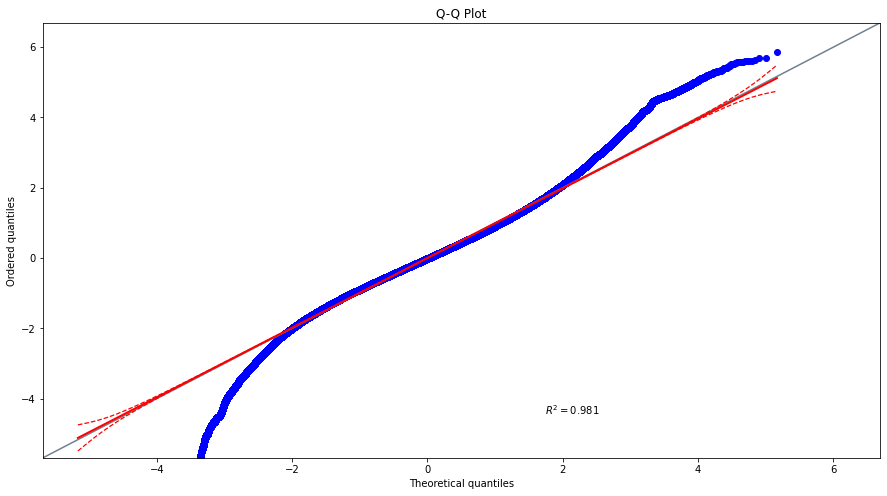

In [45]:
pg.qqplot(lr4.resid, dist='norm', figsize=(15,8))
plt.savefig('graph\Plot RL Residus.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5);



In [46]:
#Jarque-Bera's normality test
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(lr4.resid) 
print(JB, JBpv, skw, kurt) 

1783951.7734366213 0.0 -0.12479870155659724 5.705470484718527


In [47]:
H0: Les données suivent une loi normale
H1: Les données ne suivent pas une loi normale
JBpv ~ 0, on rejette H0, d'après le test, les données ne suivent pas une loi normale

SyntaxError: invalid syntax (2731975968.py, line 1)

In [ ]:


#Représentation de la distribution marginale
plt.figure(figsize=(10,10))

plt.hist(lr4.resid, 100, facecolor='g')
plt.axvline(Xbar_ln2, color='r', linewidth=2)

plt.title(f'Distribution marginale des résidus', fontsize=22)
plt.ylabel('Nombre',fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Résidus', fontsize=18)
plt.xticks(fontsize=16)

plt.tight_layout()

plt.savefig('graph/dist_marg_resid_reg2.png')
plt.show()

<div class="admonition note alert alert-info" style="color:#4cb2ff">
D'après ce QQ-plot, l'hypothèse de normalité pourrait être remise en cause (les extrémités s'écartent relativement de la ligne rouge (représentant une distribution normale), suggérant des valeurs atypiques).


<br><br>Néanmoins, le fait que les résidus ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes.

<br><br> 
Notons cependant que la transformation logarithmique des données permet d'augmenter de manière assez satisfaisante la variance totale expliquée par le modèle.

</div>

<a id='breu2'></a>
<h3 style='color:#8677b2'>Test d'homoscédasticité</h3>

[Haut de page](#sommaire)

In [ ]:
def residual_variance(model):
    plt.plot(model.fittedvalues, model.resid, color='#61ba86')
    plt.title('Cloud of the residual variance ', fontsize=18, pad=30)
    #plt.xlabel("GWh", fontsize=16)
    plt.ylabel("Résidus", fontsize=16)
    plt.savefig('data\ Nuage de la variance des résidus RL.jpeg', dpi=300, bbox_inches='tight', pad_inches=0.5);

In [ ]:
residual_variance(lr4)

In [ ]:
variables = lr3.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr3.resid, variables)

print('p value test Breusch Pagan:', pval)

H0: Homoscédasticité  
H1: Hétéroscédasticité  
pvalue <<< alpha, rejet de H0, il y a hétéroscédasticité des residus  


<div class="admonition note alert alert-info" style="color:#4cb2ff">

Toutefois, le modèle de regression linéaire multiple est robuste pour les grands échantillon. 5_800_000 ici, c'est notre cas.  
Plus on a de données à disposition, plus le modèle est capable de supporter des écarts important aux hypothèse (gaussienne et homoscédastique).</div>

## Calculate the levers

<div class="admonition note alert alert-info" style="color:#4cb2ff">
Nous allons mener des analyses sur des valeurs atypiques et/ou influentes en travaillant sur une dataframe appelée analyses.</div>

<div class="alert alert-block alert-warning">
Un effet de levier (Hi) mesure la distance entre la valeur X d'une observation et la moyenne des valeurs X de toutes les observations d'un ensemble de données. Les observations à fort effet de levier peuvent avoir un effet important sur la valeur ajustée et, par conséquent, sur le modèle de régression.</div>

In [ ]:
#keep only usefull columns
dfa = df[['country','ln_y_child', 'ln_mj', 'Gj', 'c_i_parent']]
dfa = dfa.set_index('pays')

#n = the number of individuals in the sample, and p = the number of explanatory variables
n = dfa.shape[0]
p = dfa.shape[1] - 1

analyses = pd.DataFrame({'obs' : dfa.index})

In [ ]:
#identification 
analyses['levier'] = lr4.get_influence().hat_matrix_diag

seuil_levier = 2 * (p+1) / n

analyses.loc[analyses['levier'] > seuil_levier, :].groupby('obs')['levier'].mean()

In [ ]:
round(analyses.loc[analyses['levier'] > seuil_levier, :].shape[0] / n, 2)

In [ ]:
#an observation is suspect when ti* > st

# standardized residuals
res_stds = lr4.get_influence().resid_studentized_internal

#standardized residues
res_studs = res_stds*np.sqrt((n-p-2)/(n-p-1-res_stds**2)) 

#studentized residual threshold
seuil_stud = st.t.ppf(0.975, df=n-p-2) 
 
#detection - abs val. > threshold
atyp_stud = np.abs(res_studs) > seuil_stud 
 
#which ?
#print(dfa.index[atyp_stud], res_studs[atyp_stud])

In [ ]:
#combination of leverage and studentized residue criteria
atyp_levier = analyses['levier'] > seuil_levier 
pbm_infl = np.logical_or(atyp_levier,atyp_stud) 
dfa.index[pbm_infl].value_counts()

In [ ]:
round(dfa.index[pbm_infl].shape[0] / n, 2)